**ML - Fall 2023 - Practical 4**

**Support Vector Machine**

**Student Name: Ali Aghayari** <br>
**Student Number: 400104715**

# P0: Intro

Sentiment Analysis is a Natural Language Processing technique that allows us to determine the sentiment or opinion of a given text. It is a very useful technique that allows us to extract insights from social media, customer feedback, product reviews, etc. This assignment focuses on building a sentiment classifier using the SVM algorithm. You are given a dataset of tweets along with their corresponding sentiments. Your task is to build a classifier that can determine the sentiment of a given tweet.

# P1: Data Exploration

The dataset provided to you includes one file: `sentiment.csv`.
Run the below cells to download the data.

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1XHeTYh-jGBHq1lpbOVq1HX-N4EsUIQgA'
path = 'sentiment.csv'

gdown.download(url, path, quiet=True)
data = pd.read_csv(path, encoding = "ISO-8859-1")

data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## The Distribution of Labels

Extract the labels of the Sentiment column and plot the distribution of samples according to it. **(P1-1: 2.5 points)**

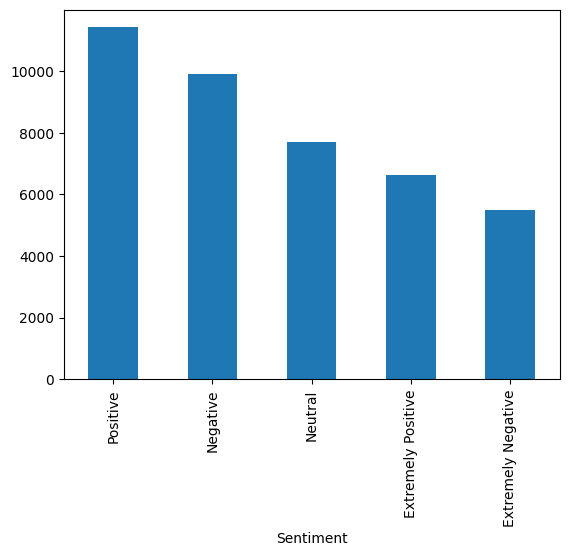

In [3]:
import matplotlib.pyplot as plt

DF = data 

DF["Sentiment"].value_counts().plot(kind = "bar")
plt.show()

## Texts Distribution

Plot the distribution of tweets according to their lengths. **(P1-2: 2.5 points)**

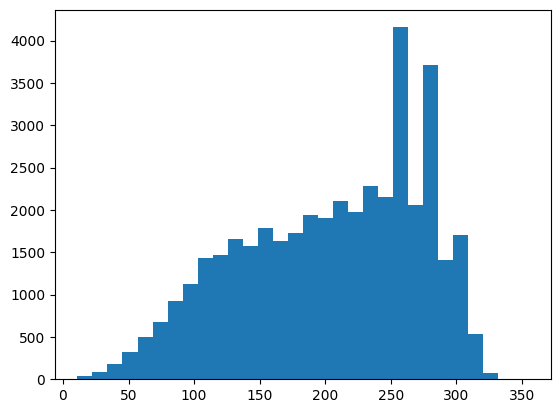

In [4]:
lengths = DF["OriginalTweet"].apply(len)

plt.hist(lengths ,bins = 30)
plt.show()

## Outliers

According to the obtained distributions, reason whether it is necessary to remove outliers or not. If your answer is yes, determine the appropriate remove range and delete these outliers in the dataset cleaning section. **(P1-3: 5 points)**

In [5]:
"""
it seems that we dont need to remove outliers since they are not that far from the rest of the data 
but we will try to remove the outliers with the statistical approach to make sure.

"""
Q1 = lengths.quantile(0.25)
Q3 = lengths.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ",lower_bound,"    Upper Bound: " ,upper_bound)
print("min value: ",min(lengths),"    max value: " ,max(lengths))
 
# seems we dont need to remove them !print("percentage missing values : " ,DF.isnull().sum(axis = 1).sum() / len(DF) * 100)

DF = DF.dropna()

print("percentage missing values after elimination : " ,DF.isnull().sum(axis = 1).sum() / len(DF) * 100)

Lower Bound:  -11.0     Upper Bound:  421.0
min value:  11     max value:  355
percentage missing values after elimination :  0.0


## Missing Values

What percentage of dataset rows should be deleted due to missing values? Delete these row in the dataset cleaning section. **(P1-4: 2.5 points)**

In [6]:
print("percentage missing values : " ,DF.isnull().sum(axis = 1).sum() / len(DF) * 100)

DF = DF.dropna()

print("percentage missing values after elimination : " ,DF.isnull().sum(axis = 1).sum() / len(DF) * 100)

percentage missing values :  0.0
percentage missing values after elimination :  0.0


## Most Frequent Words

Use the `nltk` library and plot the 30 most frequent words in order of occurrence. Then do this for each set of positive, negative and neutral tweets separately. **(P1-5: 10 points)**

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')

def DistCal(inp):
    sentences = inp['OriginalTweet'].str.cat(sep=' ')
    words = word_tokenize(sentences)
    return FreqDist([w.lower() for w in words if w.isalpha()])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


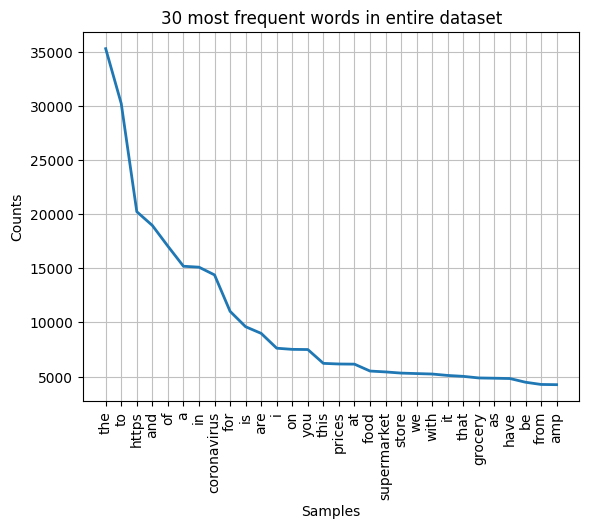

In [8]:
DistCal(DF).plot(30 ,cumulative = False ,title = "30 most frequent words in entire dataset")
plt.show()

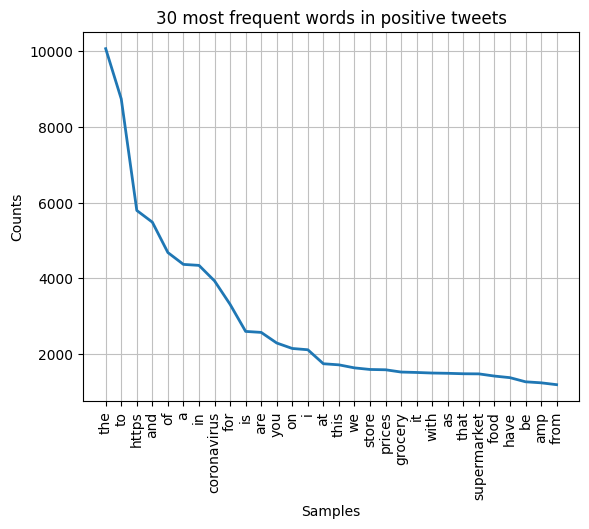

In [9]:
DistCal(DF[ DF["Sentiment"] == "Positive" ]).plot(30 ,cumulative = False ,title = "30 most frequent words in positive tweets")
plt.show()

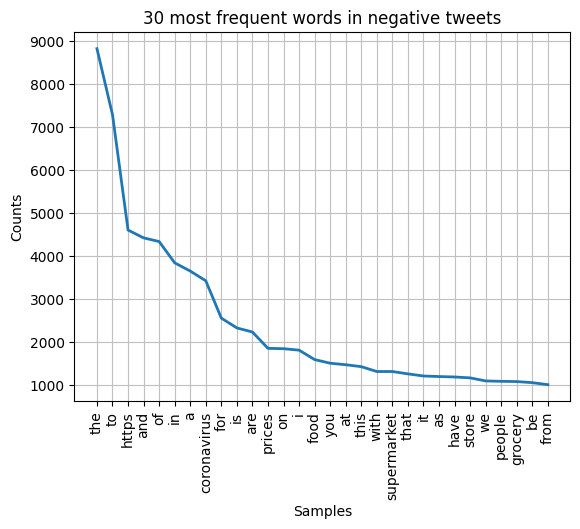

In [10]:
DistCal(DF[ DF["Sentiment"] == "Negative" ]).plot(30 ,cumulative = False ,title = "30 most frequent words in negative tweets")
plt.show()

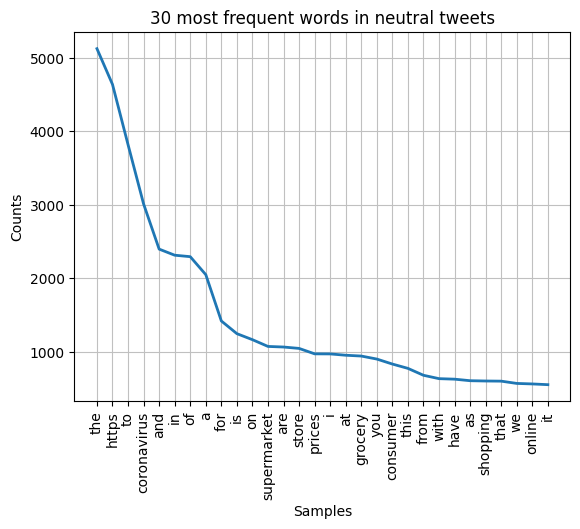

In [11]:
DistCal(DF[ DF["Sentiment"] == "Neutral" ]).plot(30 ,cumulative=False ,title = "30 most frequent words in neutral tweets")
plt.show()

# P2: Preprocessing

## Dataset Cleaning

Remove unrelevant columns and do other necessary cleanings. **(P2-1: 5 points)**

In [12]:
print(DF.columns)
DF_ = DF.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1)
print(DF_.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')
Index(['OriginalTweet', 'Sentiment'], dtype='object')


## Labeling

Based on the `Sentiment` column, generate 3 labels by considering the extremely positive tweets as positive and the extremely negative ones as negatives. **(P2-2: 2.5 points)**

In [13]:
def new_labels(sentiment):
    if sentiment == 'Extremely Positive' or sentiment == 'Positive':
        return 'Positive'
    elif sentiment == 'Extremely Negative' or sentiment == 'Negative':
        return 'Negative'
    else:
        return 'Neutral'

DF_['Sentiment_'] = DF_['Sentiment'].apply(new_labels)
# DF_.Label.unique()

## Text Cleaning

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) **(P2-3: 2.5 points)**

In [14]:
import re

def rem_url(t):
    return re.sub(r'https?://\S+|www\.\S+', '', t)

DF_['OriginalTweet'] = DF_['OriginalTweet'].apply(rem_url)

Remove everything except alphabetical and numerical characters. (Use pattern `[^a-zA-Z0-9]`) **(P2-4: 2.5 points)**

In [15]:
def rem_non_alpha(t):
    return re.sub(r'[^a-zA-Z0-9]', ' ', t)

DF_['OriginalTweet'] = DF_['OriginalTweet'].apply(rem_non_alpha)

Lower all letters. Then use `nltk` and tokenize tweets. Then replace each word with its root and remove the stopwords. **(P2-5: 10 points)**

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')

porter = PorterStemmer()
st = SnowballStemmer('english')

def p_t(t):
    return ' '.join([st.stem(w) for w in t if w not in stopwords.words('english')])

DF_['OriginalTweet'] = DF_['OriginalTweet'].str.lower().apply(word_tokenize).apply(p_t)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Generation

Use `CountVectorizer` class (belonging to `sklearn`) construct a feature vector from each tweet. **(P2-6: 5 points)**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000)
FVA = vectorizer.fit_transform(DF_['OriginalTweet'].tolist()).toarray()

# P3: Modeling

Convert the dataset to a dataframe (or some `numpy` arrays) and split it into train and test sets. **(P3-1: 5 points)**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = FVA
y = DF_['Sentiment_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train : " ,X_train.shape ," y train : " ,y_train.shape)
print("self.alphasX test : " ,X_test.shape ," y test : " ,y_test.shape)

X train :  (26053, 1000)  y train :  (26053,)
self.alphasX test :  (6514, 1000)  y test :  (6514,)


Use the `SVC` class (belonging to `sklearn`) to train a SVM classifier. (**P3-2: 5 points**)

In [19]:
from sklearn.svm import SVC

sklearn_svm = SVC(kernel='linear', random_state=42)
sklearn_svm.fit(X_train, y_train)

y_pred_sklearn = sklearn_svm.predict(X_test)

Complete the definition of the following class to implement a SVM classifier capable of separating only the positive and negative classes. **(P3-3: 15 points)**


In [20]:
!pip install cvxopt

  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/41/6d/98814860dbb9cdc27dcb6651b35124d7adca3bfe281f3351abb02a8a3f72/cvxopt-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 61.7 MB/s eta 0:00:00


In [21]:
import numpy as np
from cvxopt import matrix, solvers

class SVM:
    def __init__(self):
        self.W = None
        self.B = None


    def fit(self, X, y):
        """Fit the SVM model to dataset X in one-vs-one manner.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.
        
        y : array-like of shape (n_samples,)
            Training labels, where `n_samples` is the number of samples.

        Returns
        -------
        self : object
            Returns the instance itself.
        """
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        
        P = matrix((np.outer(y, y) * np.dot(X, X.T)).astype('float'))
        q = matrix(-np.ones((n_samples, 1)).astype('float'))
        G = matrix((np.vstack((np.eye(n_samples)*(-1),np.eye(n_samples)))).astype('float'))
        h = matrix((np.hstack((np.zeros(n_samples), np.ones(n_samples) * 0.1))).astype('float'))
        A = matrix((y.reshape(1, -1)).astype('float'))
        b = matrix(np.array([0.0]))

        sol = solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol['x'])
        sv = (alphas > 1e-4).flatten()
        
        self.A = alphas[sv]
        self.SV = X[sv]
        self.SVL = y[sv]

        self.W = np.dot(self.A * self.SVL.T, self.SV)
        self.B = np.mean(self.SVL - np.dot(self.SV, self.W.T))

        return self
    
    def transform(self, X):
        """Fit the model with X and apply the dimensionality reduction on X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.

        Returns
        -------
        y_pred : ndarray of shape (n_samples)
            Your predictions for the class of each sample
        """
        return np.sign(np.dot(X, self.W.T) + self.B)

Train the binary SVM classifier using the class you have implemented. **(P3-4: 5 points)**

In [22]:
custom_svm = SVM()
labeled = np.where(y_train == 'Positive', 1, -1)
custom_svm.fit(X_train[0:16000], labeled[0:16000])

"""
because of some memory limitations
"""

     pcost       dcost       gap    pres   dres
 0: -4.9581e+03 -4.7196e+03  2e+05  4e+01  1e-13
 1: -9.4662e+02 -4.5319e+03  2e+04  3e+00  1e-13
 2: -5.9730e+02 -3.4894e+03  5e+03  4e-01  3e-14
 3: -5.5055e+02 -1.3269e+03  8e+02  2e-02  2e-14
 4: -6.5064e+02 -8.7834e+02  2e+02  6e-03  2e-14
 5: -6.8787e+02 -8.0982e+02  1e+02  3e-03  2e-14
 6: -7.1037e+02 -7.6731e+02  6e+01  1e-03  2e-14
 7: -7.2155e+02 -7.4758e+02  3e+01  3e-04  3e-14
 8: -7.2747e+02 -7.3793e+02  1e+01  1e-04  3e-14
 9: -7.3032e+02 -7.3362e+02  3e+00  2e-05  3e-14
10: -7.3124e+02 -7.3232e+02  1e+00  6e-06  3e-14
11: -7.3157e+02 -7.3187e+02  3e-01  5e-07  3e-14
12: -7.3168e+02 -7.3173e+02  5e-02  8e-08  3e-14
13: -7.3170e+02 -7.3171e+02  4e-03  5e-09  3e-14
14: -7.3171e+02 -7.3171e+02  2e-04  2e-10  3e-14
Optimal solution found.


'\nbecause of some memory limitations\n'

# P4: Evaluation

Using the model you trained using `sklearn`, predict the labels of the test set. **(P4-1: 5 points)**

In [23]:
y_pred_sklearn = sklearn_svm.predict(X_test)

Using the model you trained from scratch, predict the labels of the test set. **(P4-2: 5 points)**

In [24]:
y_pred_custom = custom_svm.transform(X_test)[:,0]

Plot the normalized confusion matrix of the predictions for each model. **(P4-3: 5 points)**

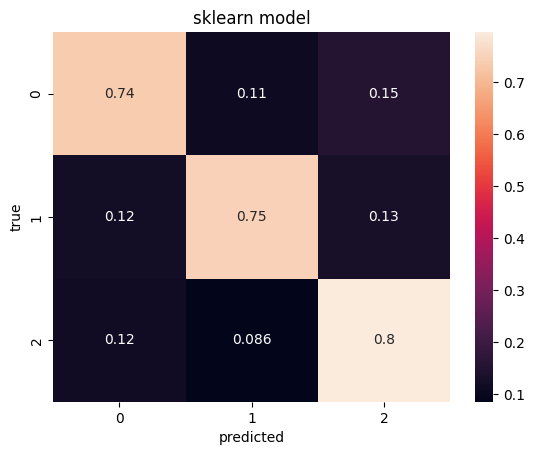

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sklearn_matrix = confusion_matrix(y_test, y_pred_sklearn, normalize='true')

sns.heatmap(sklearn_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('sklearn model')
plt.show()

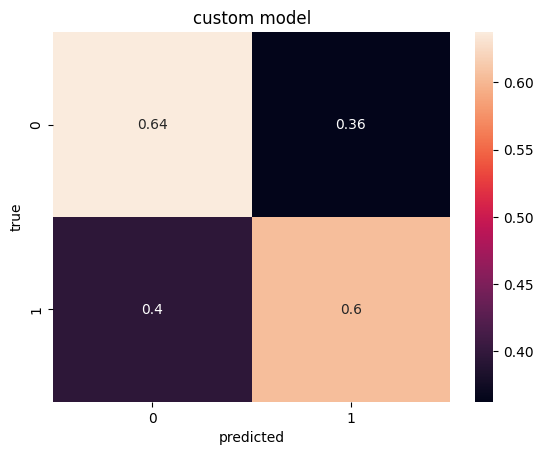

In [26]:
labeled_ = np.where(y_test == 'Positive', 1, -1)

custom_matrix = confusion_matrix(labeled_, y_pred_custom, normalize='true')

sns.heatmap(custom_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('custom model')
plt.show()

# P5: Neural Net

Using all you have learned about neural networks, train a neural net to classify tweets as `[positive, negative, or neutral]` (**P5: 5 points**)